In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

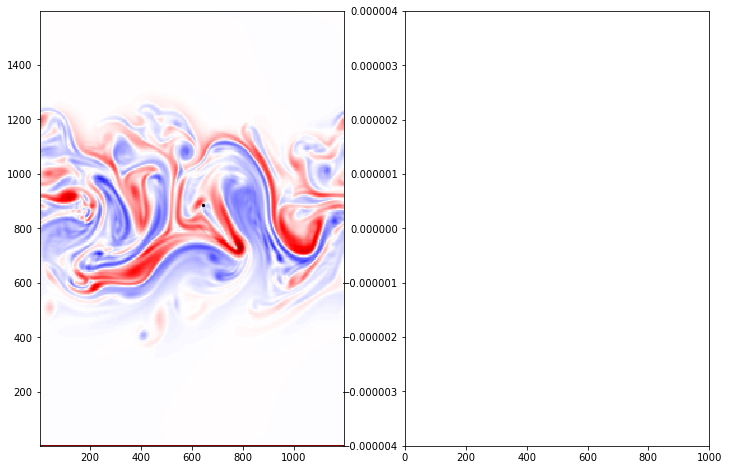

In [2]:
ds = Dataset('progRequiredFieldsOnly.nc')
RV = np.array(ds.variables['RV'])[:,:,:]
xh = np.array(ds.variables['xh'])
yh = np.array(ds.variables['yh'])

ds2 = Dataset('langrangianParticlesRand_500parts.nc')

xpos = np.array(ds2.variables['xpos'])
ypos = np.array(ds2.variables['ypos'])

Lambda = np.array(ds2.variables['Lambda'])
Pi = np.array(ds2.variables['Pi'])

mask = abs(Lambda) > 1e4

PID = 2

xpos = np.ma.array(xpos, mask = mask, fill_value=float('nan')).filled()
ypos = np.ma.array(ypos, mask = mask, fill_value=float('nan')).filled()
Lambda = np.ma.array(Lambda, mask = mask, fill_value=float('nan')).filled()
Pi = np.ma.array(Pi, mask = mask, fill_value=float('nan')).filled()

Lx = np.arange(1000)
Ly = np.ones((1000), dtype=float) * float('nan')

Px = np.arange(1000)
Py = np.ones((1000), dtype=float) * float('nan')

xlen = len(xh)
ylen = len(yh)

xsize = 12
ysize = ylen/xlen * xsize * 0.5
fig, ax = plt.subplots(nrows = 1, ncols =2, figsize = (xsize, ysize))

ax[1].set_xlim(( 0, 1000))
ax[1].set_ylim((-4e-6, 4e-6))

pmesh = ax[0].pcolormesh(xh, yh, RV[0,:,:], vmin = -1e-4, vmax = 1e-4, cmap='seismic')
scat = ax[0].scatter(xpos[0,PID], ypos[0,PID], c ='k', s = 5)
line1, = ax[1].plot(Lx, Ly, c = 'blue', label='Lambda')
line2, = ax[1].plot(Px, Py, c = 'green', label='Pi')


def init():
    Py[0] = Pi[0, PID]
    Ly[0] = Lambda[0, PID]
    line1.set_data(Lx, Ly)
    line2.set_data(Px, Py)
    pmesh.set_array(RV[0,:-1,:-1].flatten())
    arr = np.stack((xpos[0,PID], ypos[0,PID]), axis = 0).transpose()
    scat.set_offsets(arr)
    return scat, pmesh, line1, line2,

def animate(i):
    Py[i] = Pi[i, PID]
    Ly[i] = Lambda[i, PID]    
    line1.set_data(Lx, Ly)
    line2.set_data(Px, Py)
    
    pmesh.set_array(RV[i,:-1,:-1].flatten())
    arr = np.stack((xpos[i,PID], ypos[i,PID]), axis = 0).transpose()
    
    scat.set_offsets(arr)
    
    return scat, pmesh, line1, line2, 


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=999, interval=5, blit=False)

In [62]:
HTML(anim.to_html5_video())

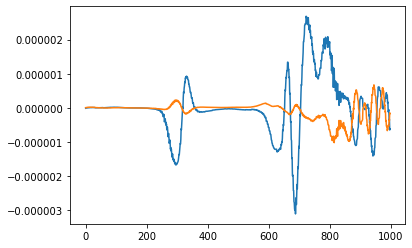

In [34]:
plt.plot(Lamda[:,2])
plt.plot(Pi[:,2])

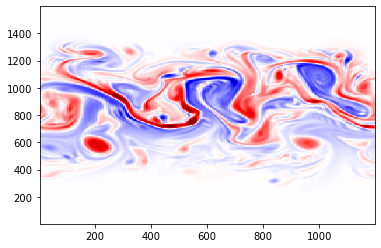

In [43]:
plt.pcolormesh(xh, yh, RV[1000,:,:], vmin = -1e-4, vmax = 1e-4, cmap='seismic')

In [3]:
u = np.array(ds.variables['u'])[:,:,:]
time = np.array(ds.variables['Time'])

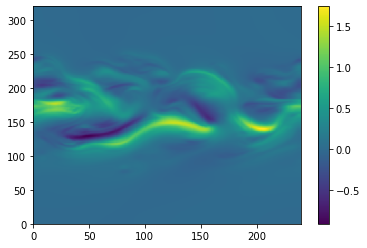

In [9]:
plt.pcolormesh(u[0,:,:])
plt.colorbar()

In [5]:
ds.variables['Time'].units

'days since 0001-01-01 00:00:00'